In [33]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/jirka/bakalarka/music-transcription/")

import evaluation
import pandas
import os
import visualization as vis
import mir_eval
from glob import glob

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(rc={'figure.figsize':(10,6)})
sns.set(style="whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
def load_data(paths, attributes=None, attr_names=None):
    data = []
    for attrs, path in zip(attributes, paths):
        path = os.path.join(path, "model-f0-outputs")
        results = evaluation.results("test", path, ".csv")
        if attributes:
            for name, attr in zip(attr_names, attrs):
                results[name] = attr
        data.append(results)
    return pandas.concat(data)

def plot_data(data, attr_names):
    plot_metric = "Raw Pitch Accuracy"
    drop_metrics = ['Voicing Recall', 'Voicing False Alarm', "Overall Accuracy"]

    hue = None
    palette = "Blues"
    if len(attr_names) > 1:
        hue = attr_names[1]
        palette = None
    sns.boxplot(x=plot_metric, y=attr_names[0], hue=hue, data=data, fliersize=0, palette=palette)
    sns.swarmplot(x=plot_metric, y=attr_names[0], hue=hue, data=data, dodge=True, linewidth=1, edgecolor='gray', palette=palette)
    return data.drop(drop_metrics, axis=1).groupby(attr_names).mean()

In [65]:
paths = [
    "./crepe/FINAL/negranularni_vystup/0305_161351-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm4-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1",
    "./crepe/FINAL/negranularni_vystup/0305_165012-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1",
    "./crepe/FINAL/negranularni_vystup/0305_174655-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm16-cg0.0-llw0.0-mc0-bps1-as0.0-mw1.0-vsFalse-flc1",
    "./crepe/FINAL/negranularni_vystup/0305_203237-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm4-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1",
    "./crepe/FINAL/negranularni_vystup/0305_211402-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1",
    "./crepe/FINAL/negranularni_vystup/0306_010342-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.001-cg0.0-llw0.0-bps5-as0.25-mw1.0-cm16-mc0-vsFalse-flc1",
]
attr_names = [
    "Kapacita", "Diskretizace"
]
attributes = [
    ["4x",  "hrubá diskretizace"],
    ["8x",  "hrubá diskretizace"],
    ["16x", "hrubá diskretizace"],
    ["4x",  "jemná diskretizace"],
    ["8x",  "jemná diskretizace"],
    ["16x", "jemná diskretizace"],
]
data = load_data(paths, attributes, attr_names)

Raw Pitch Accuracy  Raw Chroma Accuracy
Kapacita Diskretizace                                               
16x      hrubá diskretizace            0.590776             0.689634
         jemná diskretizace            0.633319             0.734200
4x       hrubá diskretizace            0.562820             0.677894
         jemná diskretizace            0.591071             0.713971
8x       hrubá diskretizace            0.585146             0.694344
         jemná diskretizace            0.620805             0.728928

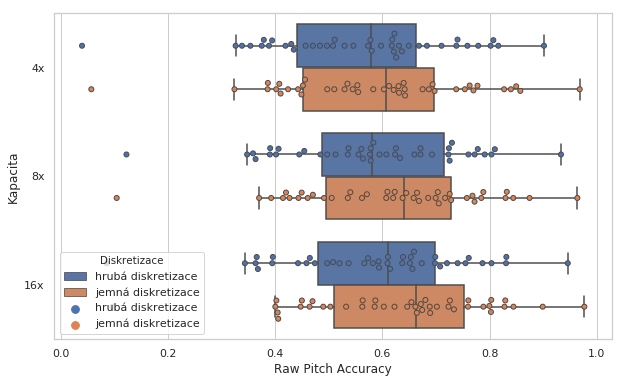

In [66]:
plot_data(data, attr_names)

In [67]:
paths = [
"./crepe/FINAL/negranularni_vystup/0305_211402-crepe-dmdb-bs32-apw1-hsNone-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25-mw1.0-vsFalse-flc1",
"./crepe/FINAL/multiresolution/0227_085314-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc2-bps5-as0.25",
"./crepe/FINAL/multiresolution/0227_094505-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc3-bps5-as0.25",
"./crepe/FINAL/multiresolution/0227_103748-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc4-bps5-as0.25",
"./crepe/FINAL/multiresolution/0227_113141-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc5-bps5-as0.25",
"./crepe/FINAL/multiresolution/0227_130211-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc6-bps5-as0.25",
"./crepe/FINAL/multiresolution/0227_143437-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc7-bps5-as0.25",
"./crepe/FINAL/multiresolution/0227_160311-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc8-bps5-as0.25",
]
attr_names = [
    "Rozlišení konvolucí"
]
attributes = [
["512"],
["512,256"],
["512,256,128"],
["512,...,64"],
["512,...,32"],
["512,...,16"],
["512,...,8"],
["512,...,4"],
]
data = load_data(paths, attributes, attr_names)

,Raw Pitch Accuracy,Raw Chroma Accuracy
Rozlišení konvolucí,,
512,0.620805,0.728928
"512,...,16",0.633641,0.736926
"512,...,32",0.625156,0.729644
"512,...,4",0.628102,0.731269
"512,...,64",0.619957,0.729511
"512,...,8",0.629477,0.732586
"512,256",0.616456,0.726137
"512,256,128",0.621939,0.727150


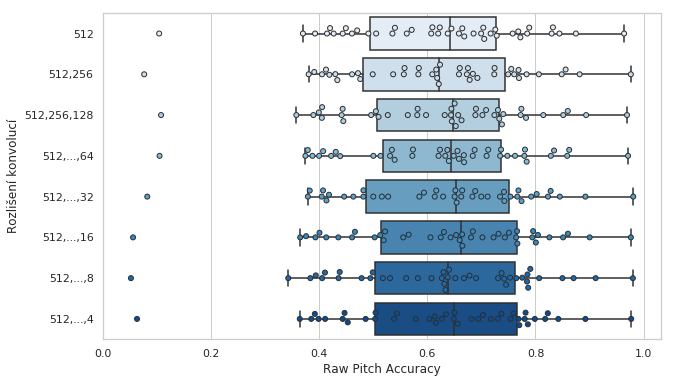

In [68]:
plot_data(data, attr_names)

In [69]:
paths = [
"./crepe/FINAL/sirka_okna/0226_233744-crepe-dmdb,orchset-bs32-apw1-fw93-cw210-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25",
"./crepe/FINAL/sirka_okna/0227_003017-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25",
"./crepe/FINAL/sirka_okna/0227_013427-crepe-dmdb,orchset-bs32-apw1-fw93-cw978-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25",
"./crepe/FINAL/sirka_okna/0227_025011-crepe-dmdb,orchset-bs32-apw1-fw93-cw2002-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25",
"./crepe/FINAL/sirka_okna/0227_045758-crepe-dmdb,orchset-bs32-apw1-fw93-cw4050-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25"
]
attr_names = [
    "Šířka vstupního okna"
]
attributes = [
["512 samples"],
["1024 samples"],
["2048 samples"],
["4096 samples"],
["8192 samples"],
]
data = load_data(paths, attributes, attr_names)

,Raw Pitch Accuracy,Raw Chroma Accuracy
Šířka vstupního okna,,
1024 samples,0.611734,0.724693
2048 samples,0.616165,0.723914
4096 samples,0.612847,0.720113
512 samples,0.601856,0.714499
8192 samples,0.637268,0.728487


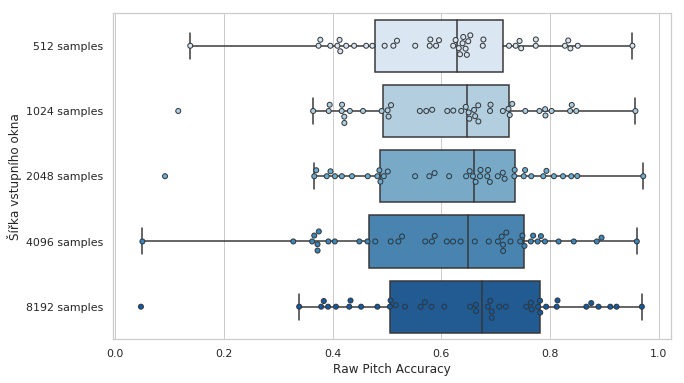

In [71]:
plot_data(data, attr_names)

In [73]:
paths = [
"./crepe/FINAL/sirka_okna/0227_003017-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc0-bps5-as0.25",
"./crepe/FINAL/miss_weight/0301_133936-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc6-bps5-as0.25-mw0.05",
"./crepe/FINAL/miss_weight/0301_153037-crepe-dmdb,orchset-bs32-apw1-fw93-cw466-s16000-inTrue-lr0.0002-cm8-cg0.0-llw0.0-mc6-bps5-as0.25-mw0.5"
]
attr_names = [
    "Váha chyby estimace"
]
attributes = [
["5%"],
["50%"],
["100%"],
]
data = load_data(paths, attributes, attr_names)

,Raw Pitch Accuracy,Raw Chroma Accuracy
Váha chyby estimace,,
100%,0.627782,0.731737
5%,0.611734,0.724693
50%,0.579551,0.719880


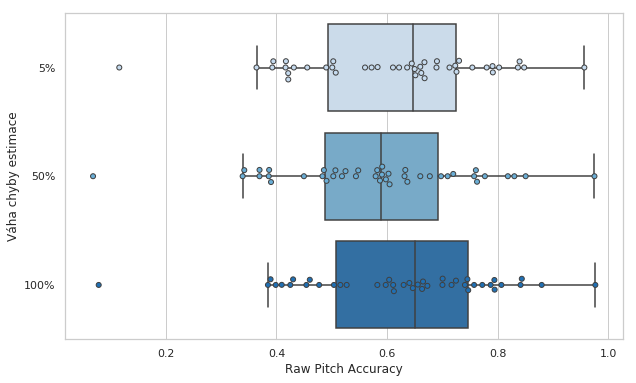

In [74]:
plot_data(data, attr_names)